In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics 
import sklearn
import io

In [11]:
users = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\users.csv')

In [12]:
notif = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\notifications.csv')

In [13]:
devices = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\devices.csv')

In [14]:
trans1 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_1.csv')

In [15]:
trans2 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_2.csv')

In [16]:
trans3 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_3.csv')

In [17]:
transactions = pd.concat([trans1,trans2,trans3])

# 1.Exploratory Data Analysis

## 1.1 Users Upload




In [18]:
print(f'Rows : {len(users)}, Columns : {len(users.columns)}')

Rows : 15544, Columns : 12


In [19]:
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0


In [20]:
users.dtypes

user_id                                      object
birth_year                                    int64
country                                      object
city                                         object
created_date                                 object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push     float64
attributes_notifications_marketing_email    float64
num_contacts                                  int64
num_referrals                                 int64
num_successful_referrals                      int64
dtype: object

In [21]:
users.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals'],
      dtype='object')

### 1.1.1 Value_counts

In [22]:
users['birth_year'].value_counts()

1992    748
1989    689
1988    680
1993    679
1990    670
       ... 
1939      2
1929      1
1930      1
1938      1
1935      1
Name: birth_year, Length: 69, dtype: int64

In [23]:
users['country'].value_counts()

GB    5018
PL    1834
FR    1696
IE     995
RO     873
ES     784
LT     541
PT     487
MT     437
DE     358
CH     350
CZ     287
IT     241
GR     182
CY     154
LV     133
NL     132
HU     125
BE     113
SE     104
BG      78
DK      77
NO      75
SI      71
AT      68
SK      65
HR      49
JE      45
GI      35
FI      32
EE      30
LU      21
GG      14
GP       9
IM       7
RE       7
IS       6
LI       4
AU       4
MQ       3
Name: country, dtype: int64

In [24]:
users['city'].value_counts()

London                       1342
Warszawa                      330
Paris                         292
Dublin                        286
Vilnius                       271
                             ... 
Mogilno                         1
Tredegar                        1
Saint Germain Les Arpajon       1
Birchington                     1
Boleslawiec                     1
Name: city, Length: 5197, dtype: int64

In [25]:
users['user_settings_crypto_unlocked'].value_counts()

0    12709
1     2835
Name: user_settings_crypto_unlocked, dtype: int64

In [26]:
users['plan'].value_counts()

STANDARD    14394
SILVER        713
GOLD          437
Name: plan, dtype: int64

In [27]:
users['attributes_notifications_marketing_push'].value_counts()

1.0    9752
0.0     532
Name: attributes_notifications_marketing_push, dtype: int64

In [28]:
users['attributes_notifications_marketing_email'].value_counts()

1.0    9209
0.0    1075
Name: attributes_notifications_marketing_email, dtype: int64

In [29]:
users['num_contacts'].value_counts()

0      5539
2       547
1       526
3       525
4       489
       ... 
212       1
236       1
244       1
252       1
379       1
Name: num_contacts, Length: 283, dtype: int64

In [30]:
users['num_referrals'].value_counts()

0    15544
Name: num_referrals, dtype: int64

In [31]:
users['num_successful_referrals'].value_counts()

0    15544
Name: num_successful_referrals, dtype: int64

### 1.1.2. Missing Values

In [32]:
users.isna().any()

user_id                                     False
birth_year                                  False
country                                     False
city                                        False
created_date                                False
user_settings_crypto_unlocked               False
plan                                        False
attributes_notifications_marketing_push      True
attributes_notifications_marketing_email     True
num_contacts                                False
num_referrals                               False
num_successful_referrals                    False
dtype: bool

In [33]:
users.isna().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
dtype: int64

### 1.1.3 Describe

In [34]:
users.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,15544.000000,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0
mean,1983.666624,0.182385,0.948269,0.895469,17.874228,0.0,0.0
std,11.369184,0.386174,0.221494,0.305963,47.549929,0.0,0.0
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1977.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0


## 1.2 Transactions 1 Upload

In [35]:
print(f'Rows : {len(trans1)}, Columns : {len(trans1.columns)}')

Rows : 800000, Columns : 12


## 1.3 Transactions 2 Upload

In [36]:
print(f'Rows : {len(trans2)}, Columns : {len(trans2.columns)}')

Rows : 700000, Columns : 12


## 1.4 Transactions 3 Upload

In [37]:
print(f'Rows : {len(trans3)}, Columns : {len(trans3.columns)}')

Rows : 681026, Columns : 12


## 1.4 Devices Upload

In [38]:
print(f'Rows : {len(devices)}, Columns : {len(devices.columns)}')

Rows : 15544, Columns : 2


In [39]:
devices.head()

,brand,user_id
0,Apple,user_0
1,Apple,user_1
2,Apple,user_2
3,Apple,user_3
4,Apple,user_4


In [40]:
devices.dtypes

brand      object
user_id    object
dtype: object

In [41]:
devices.columns

Index(['brand', 'user_id'], dtype='object')

In [42]:
devices['brand'].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64

In [43]:
devices.isna().any()

brand      False
user_id    False
dtype: bool

## 1.5 Notifications Upload

In [44]:
print(f'Rows : {len(notif)}, Columns : {len(notif.columns)}')

Rows : 97704, Columns : 5


In [45]:
notif.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574


In [46]:
notif.dtypes

reason          object
channel         object
status          object
user_id         object
created_date    object
dtype: object

In [47]:
notif.columns

Index(['reason', 'channel', 'status', 'user_id', 'created_date'], dtype='object')

### 1.5.1 Value_counts

In [48]:
notif['reason'].value_counts()

REENGAGEMENT_ACTIVE_FUNDS            28832
PROMO                                18987
NO_INITIAL_CARD_ORDER                 9071
NO_INITIAL_CARD_USE                   9035
INVEST_IN_GOLD                        6649
LOST_CARD_ORDER                       4941
PROMO_CARD_ORDER                      4358
JOINING_ANNIVERSARY                   3334
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     2851
ONBOARDING_TIPS_ACTIVATED_USERS       2423
ENGAGEMENT_SPLIT_BILL_RESTAURANT      1834
BLACK_FRIDAY                          1681
METAL_RESERVE_PLAN                     950
SILVER_ENGAGEMENT_INACTIVE_CARD        896
WELCOME_BACK                           779
BLUE_TUESDAY                           555
SILVER_ENGAGEMENT_FEES_SAVED           528
Name: reason, dtype: int64

In [49]:
notif['channel'].value_counts()

EMAIL    49149
PUSH     46244
SMS       2311
Name: channel, dtype: int64

In [50]:
notif['status'].value_counts()

SENT      71693
FAILED    26011
Name: status, dtype: int64

In [51]:
notif.isna().any()

reason          False
channel         False
status          False
user_id         False
created_date    False
dtype: bool

## 1.6 Transactions concat (trans1, trans2,trans3)

In [52]:
transactions = pd.concat([trans1,trans2,trans3])

In [53]:
transactions.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [54]:
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [55]:
transactions.dtypes

transaction_id            object
transactions_type         object
transactions_currency     object
amount_usd               float64
transactions_state        object
ea_cardholderpresence     object
ea_merchant_mcc          float64
ea_merchant_city          object
ea_merchant_country       object
direction                 object
user_id                   object
created_date              object
dtype: object

### 1.6.1 Value_counts

In [56]:
transactions['transactions_type'].value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [57]:
transactions['transactions_currency'].value_counts()

EUR    931327
GBP    702488
PLN    185800
RON    134098
USD     62331
CZK     35968
CHF     31291
SEK     17804
AUD     13161
NOK     12749
DKK     11362
HUF      6231
CAD      6036
TRY      3629
BTC      3014
ILS      2941
NZD      2795
AED      2590
JPY      2590
ZAR      2413
XRP      2101
SGD      2014
THB      1796
HKD      1381
ETH       859
MAD       645
LTC       497
BCH       284
BGN       219
HRK       187
QAR       180
MXN       108
INR       100
RUB        26
SAR        11
Name: transactions_currency, dtype: int64

In [58]:
transactions['amount_usd'].value_counts()

0.00       46490
0.85       38939
0.01       36561
8.51       36536
10.00      29336
           ...  
334.11         1
443.88         1
440.12         1
202.05         1
2274.84        1
Name: amount_usd, Length: 43465, dtype: int64

In [59]:
transactions['transactions_state'].value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [60]:
transactions['ea_cardholderpresence'].value_counts()

FALSE      1012235
TRUE        231311
UNKNOWN       4274
Name: ea_cardholderpresence, dtype: int64

In [61]:
transactions['ea_merchant_mcc'].value_counts()

5812.0    183354
5411.0    177865
5814.0     78975
6011.0     74278
4121.0     53257
           ...  
3261.0         1
1476.0         1
3220.0         1
3190.0         1
1434.0         1
Name: ea_merchant_mcc, Length: 635, dtype: int64

In [62]:
transactions['ea_merchant_city'].value_counts()

London           73463
Bucuresti        26683
Vilnius          24849
Dublin           19966
35314369001      18181
                 ...  
Wendy's Lis R        1
Arenas S Pedr        1
Massa E Coz          1
718-7209265          1
Belfast Lisbu        1
Name: ea_merchant_city, Length: 55473, dtype: int64

In [63]:
transactions['ea_merchant_country'].value_counts()

GBR    362904
IRL     99469
FRA     80269
USA     78546
POL     68411
        ...  
COD         1
PCN         1
PGB         1
GNQ         1
LSO         1
Name: ea_merchant_country, Length: 196, dtype: int64

In [64]:
transactions['direction'].value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

### 1.6.2 Missing Values

In [65]:
transactions.isna().any()

transaction_id           False
transactions_type        False
transactions_currency    False
amount_usd               False
transactions_state       False
ea_cardholderpresence     True
ea_merchant_mcc           True
ea_merchant_city          True
ea_merchant_country       True
direction                False
user_id                  False
created_date             False
dtype: bool

In [66]:
transactions.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

### 1.6.3 Describe

In [67]:
transactions.describe()

,amount_usd,ea_merchant_mcc
count,2.181026e+06,1.257051e+06
mean,1.189225e+05,5.703386e+03
std,6.955454e+07,9.480411e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.807000e+01,5.921000e+03
max,7.464155e+10,9.406000e+03


## 1.7 Check outliers

In [68]:
from scipy import stats
z= np.abs(stats.zscore(users['num_contacts']))
print(z)

[0.31282289 1.20142365 1.11729885 ... 0.03941727 0.54945639 0.20766688]


In [69]:
threshold = 3
outliers=[]
for i in range(0,len(z)):
  if z[i]>3:
    outliers.append(z[i])
print(outliers)
len(outliers)

[4.2299167531357, 3.3466062660546063, 4.482291178016013, 4.9239464215565585, 4.755696804969684, 7.636971489019917, 6.87984821437898, 8.709562794761245, 13.399520857120383, 3.367637468127966, 4.419197571795934, 3.157325447394372, 7.721096297313355, 4.524353582162731, 4.124760742768903, 3.451762276421403, 6.080662535591324, 3.9144487220353095, 3.157325447394372, 6.185818545958121, 4.293010359355778, 4.019604732402106, 3.89341751996195, 3.5358870847148407, 4.9029152194832, 3.2835126598345283, 8.835750007201401, 7.279441053772808, 4.419197571795934, 3.1362942453210128, 3.6410430950816375, 3.1993878515410907, 4.692603198749606, 4.356103965575856, 4.103729540695544, 4.166823146915622, 3.1362942453210128, 3.430731074348044, 3.052169437027575, 3.9354799241086686, 3.2835126598345283, 3.2835126598345283, 3.052169437027575, 26.16546051564952, 4.082698338622184, 3.3466062660546063, 3.662074297154997, 3.2624814577611687, 60.99313114913263, 37.16477920001647, 4.461259975942653, 3.0732006391009348, 8

193

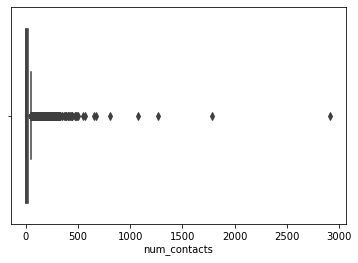

In [70]:
sns.boxplot(users['num_contacts'])

In [71]:
from scipy import stats
z= np.abs(stats.zscore(users['birth_year']))
print(z)

[0.73300285 0.11728363 1.08484241 ... 0.4984356  0.58639549 0.90892263]


In [72]:
threshold = 3
outliers=[]
for i in range(0,len(z)):
  if z[i]>3:
    outliers.append(z[i])
print(outliers)
len(outliers)

[3.049272403688712, 3.313152072783003, 3.664991631575391, 3.7529515212734883, 3.489071852179197, 3.313152072783003, 3.4011119624811, 3.2251921830849057, 3.7529515212734883, 3.1372322933868086, 3.2251921830849057, 3.1372322933868086, 3.049272403688712, 3.489071852179197, 3.2251921830849057, 3.049272403688712, 3.577031741877294, 4.808470197650653, 3.2251921830849057, 3.4011119624811, 3.664991631575391, 3.2251921830849057, 3.577031741877294, 3.2251921830849057, 3.8409114109715854, 3.7529515212734883, 4.104791080065876, 3.7529515212734883, 3.489071852179197, 3.489071852179197, 3.049272403688712, 3.1372322933868086, 3.577031741877294, 3.2251921830849057, 3.577031741877294, 4.28071085946207, 3.1372322933868086, 3.049272403688712, 3.2251921830849057, 3.577031741877294, 3.313152072783003, 3.1372322933868086, 3.2251921830849057, 3.4011119624811, 3.049272403688712, 3.1372322933868086, 3.313152072783003, 3.489071852179197, 3.489071852179197, 3.049272403688712, 3.664991631575391, 3.137232293386808

137

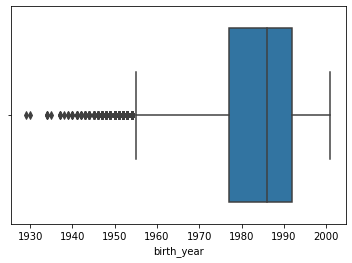

In [73]:
sns.boxplot(users['birth_year']) 

In [74]:
from scipy import stats
z= np.abs(stats.zscore(transactions['amount_usd']))
print(z)

[0.00170971 0.00170955 0.00170915 ... 0.00170971 0.00170975 0.00170971]


In [75]:
threshold = 3
outliers=[]
for i in range(0,len(z)):
  if z[i]>3:
    outliers.append(z[i])
print(outliers)
len(outliers)

[1073.1355845573446, 107.31201966068862, 10.729663169815344, 143.77039456041314, 12.58001265580834, 14.375500645554357, 47.5447741422111, 47.5447741422111, 4.752938618168873, 7.186895443238147, 14.375500645554357, 122.35762890302037, 517.5778658284711, 12.234224081986037, 12.234224081986037, 122.35762890302037, 12.234224081986037, 12.234224081986037, 12.234224081986037, 12.234224094206667, 4.280867080247972, 61.177959564710655, 8.441084595261657, 4.280867080247972, 367.07630625582783, 734.1543222852548, 122.35762890302037, 12.234224094206667, 12.234224081986037, 12.234224081986037, 11.010630707454851]


31

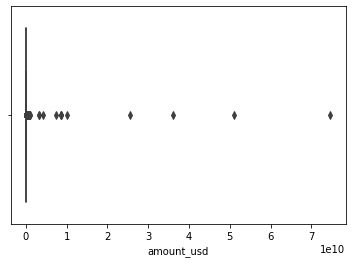

In [76]:
sns.boxplot(transactions['amount_usd']) 

## 1.8 Visualization

### 1.8.1 Users

#### 1.8.1.1 Distribution of each variable

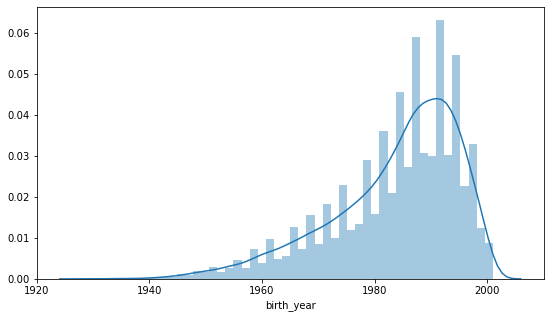

In [77]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
sns.distplot(users['birth_year'], ax = ax1)

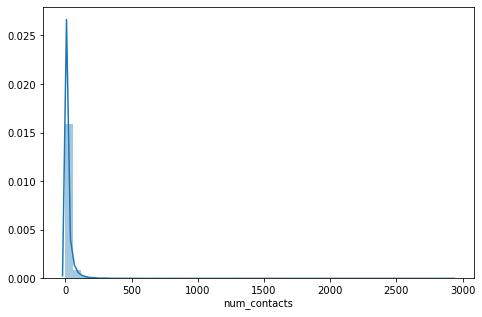

In [78]:
plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sns.distplot(users['num_contacts'], ax = ax1)

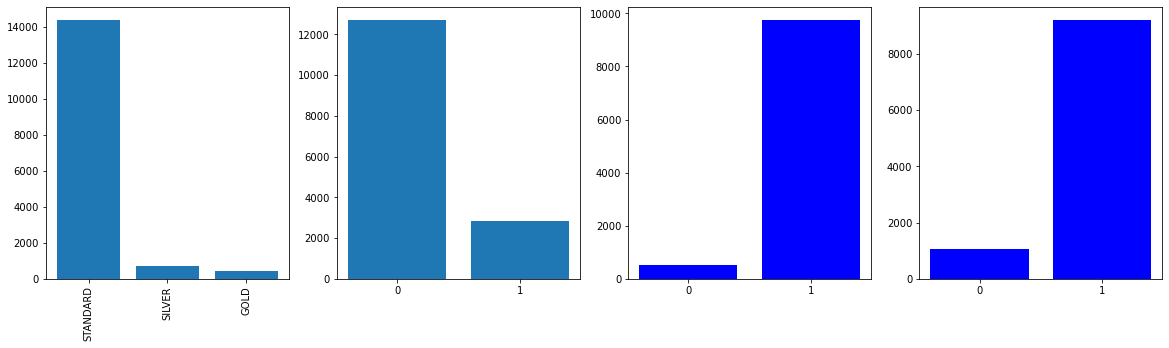

In [79]:
plt.figure(figsize=(20, 5))
labels = pd.value_counts(users['plan']).keys()
sizes = pd.value_counts(users['plan'])
ax1 = plt.subplot(141)
ax1.bar(x=labels, height= sizes)
plt.xticks(rotation=90)
labels2 = pd.value_counts(users['user_settings_crypto_unlocked']).keys()
sizes2 = pd.value_counts(users['user_settings_crypto_unlocked'])
ax2 = plt.subplot(142)
ax2.bar(x=labels2, height= sizes2)
ax2.set_xticks([0,1])
labels3 = pd.value_counts(users['attributes_notifications_marketing_push']).keys()
sizes3 = pd.value_counts(users['attributes_notifications_marketing_push'])
ax3 = plt.subplot(143)
ax3.bar(x=labels3, height= sizes3, color='blue')
ax3.set_xticks([0,1])
labels4 = pd.value_counts(users['attributes_notifications_marketing_email']).keys()
sizes4 = pd.value_counts(users['attributes_notifications_marketing_email'])
ax4 = plt.subplot(144)
ax4.bar(x=labels4, height= sizes4, color='blue')
ax4.set_xticks([0,1])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text major ticklabel objects>)

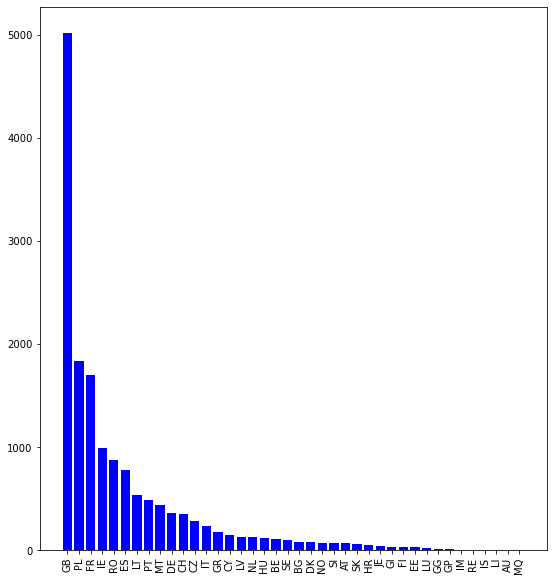

In [80]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(users['country']).keys()
sizes = pd.value_counts(users['country'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

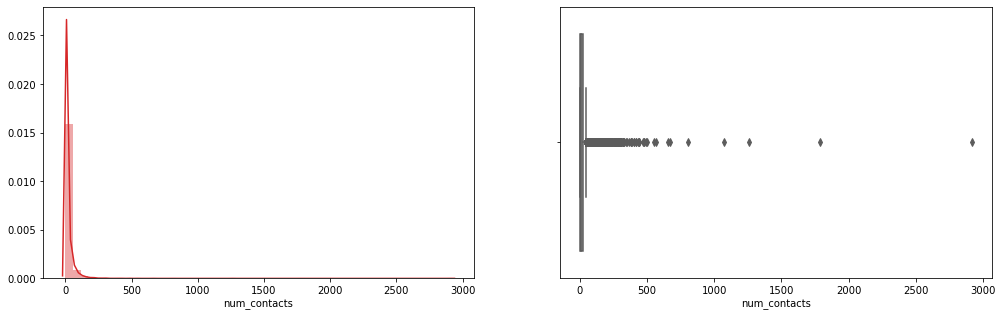

In [81]:
plt.figure(figsize=(17, 5))
ax1 = plt.subplot(121)
sns.distplot(users['num_contacts'], color='C3', ax=ax1)
ax2 = plt.subplot(122)
sns.boxplot(x='num_contacts', data=users, ax=ax2, color="0.6")

#### 1.8.1.2 Relationship between variables

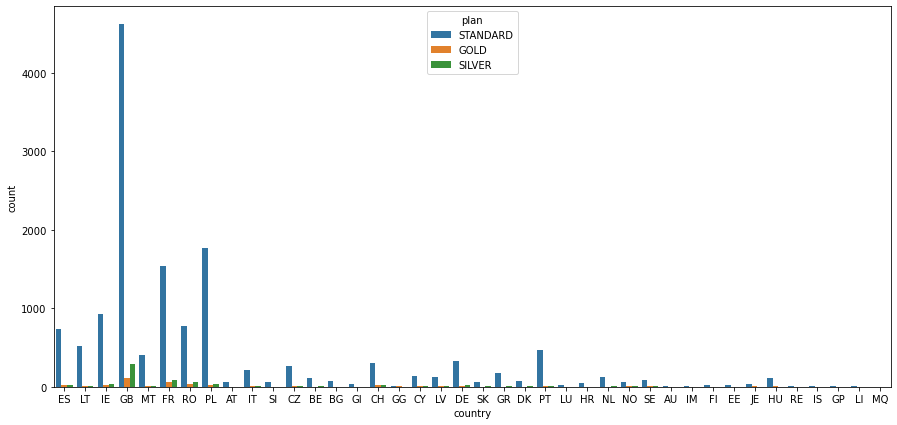

In [82]:
plt.figure(figsize=(15, 7))
sns.countplot(x='country', data=users, hue='plan')

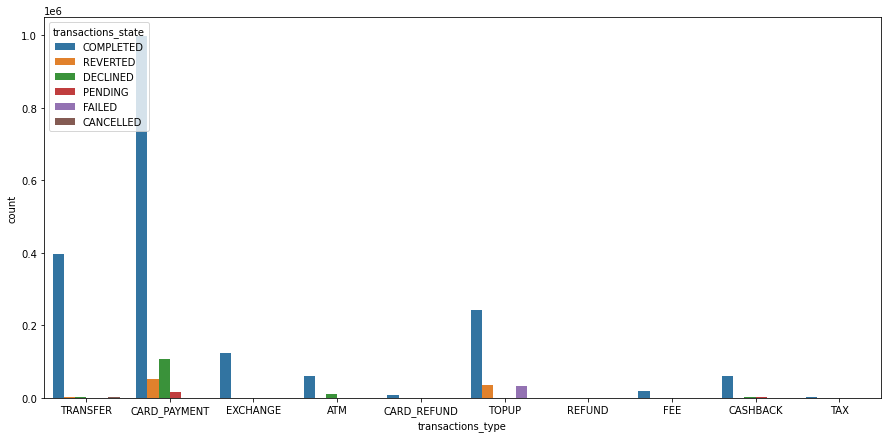

In [83]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_type', data=transactions, hue='transactions_state')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 <a list of 69 Text major ticklabel objects>)

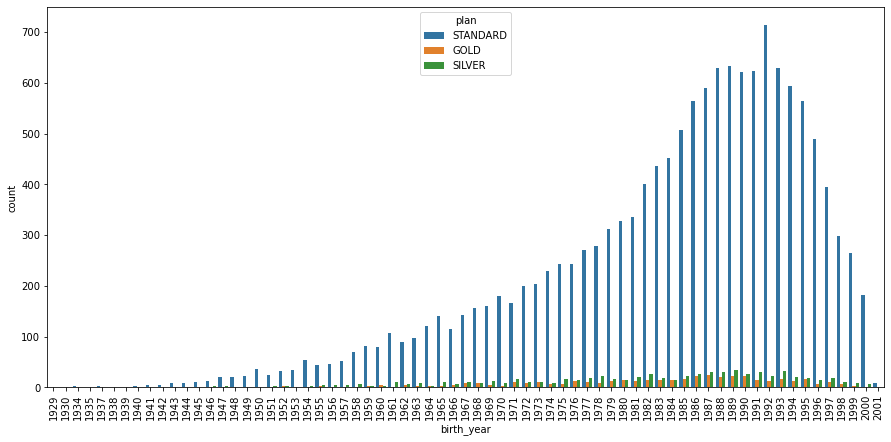

In [84]:
plt.figure(figsize=(15, 7))
sns.countplot(x='birth_year', data=users, hue='plan')
plt.xticks(rotation=90)

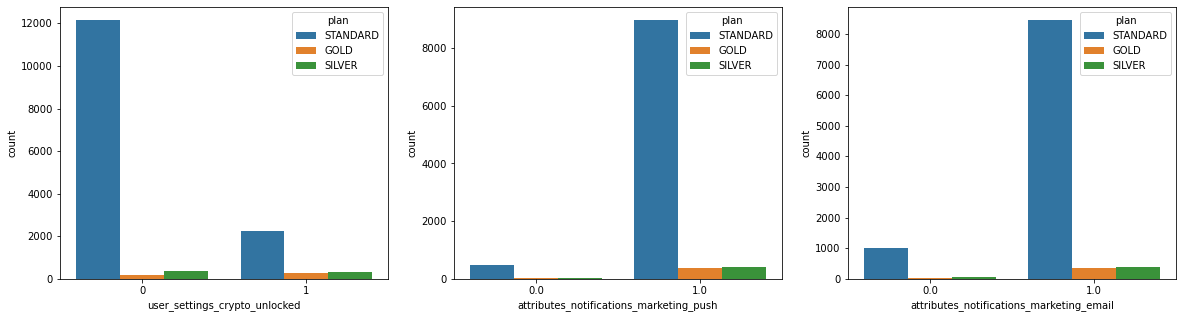

In [85]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(131)
sns.countplot(x='user_settings_crypto_unlocked', data=users, hue='plan', ax=ax1)

ax2 = plt.subplot(132)
sns.countplot(x='attributes_notifications_marketing_push', data=users, hue='plan', ax=ax2)

ax3 = plt.subplot(133)
sns.countplot(x='attributes_notifications_marketing_email', data=users, hue='plan', ax=ax3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 <a list of 69 Text major ticklabel objects>)

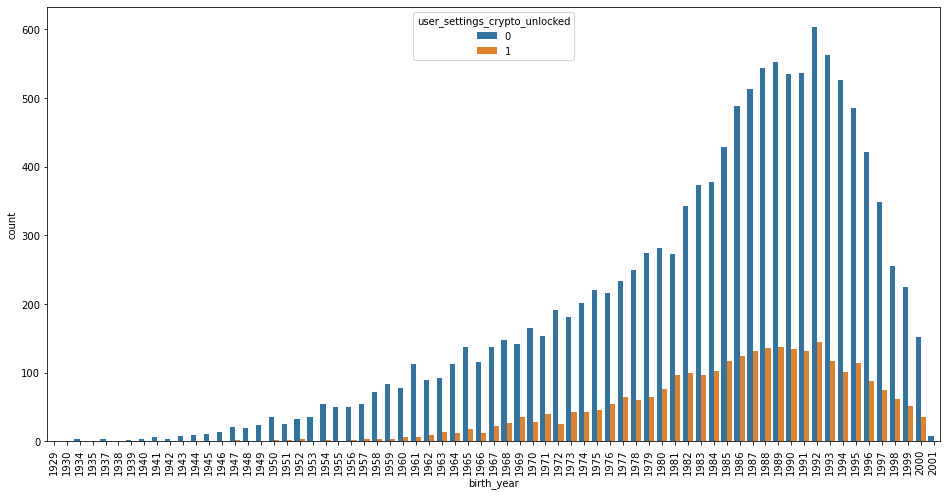

In [86]:
plt.figure(figsize=(16, 8))
sns.countplot(x='birth_year', data=users, hue='user_settings_crypto_unlocked')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

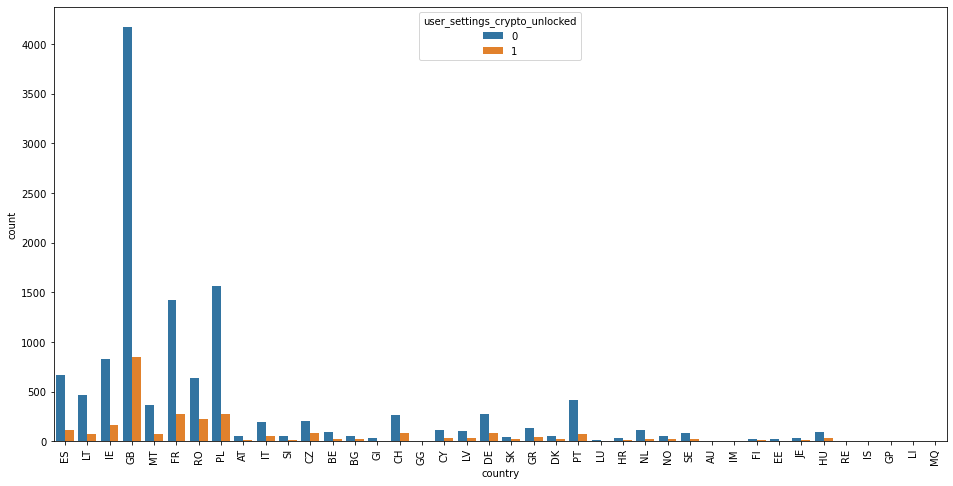

In [87]:
plt.figure(figsize=(16, 8))
sns.countplot(x='country', data=users, hue='user_settings_crypto_unlocked')
plt.xticks(rotation=90)

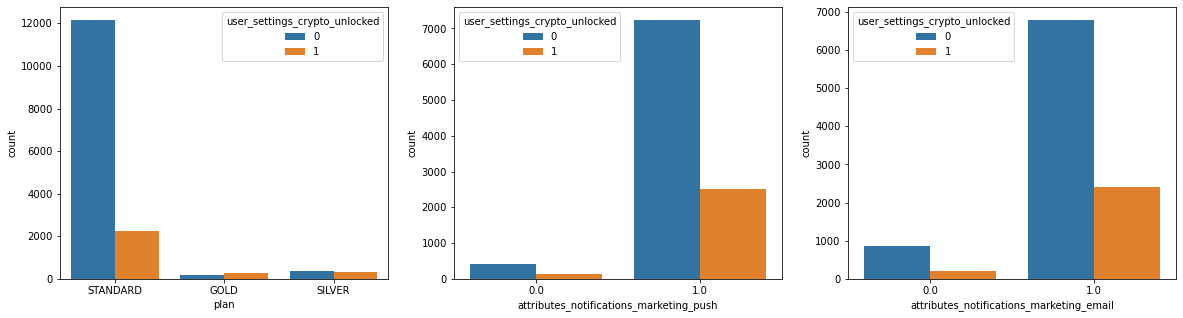

In [88]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(131)
sns.countplot(x='plan', data=users, hue='user_settings_crypto_unlocked', ax=ax1)

ax2 = plt.subplot(132)
sns.countplot(x='attributes_notifications_marketing_push', data=users, hue='user_settings_crypto_unlocked', ax=ax2)

ax3 = plt.subplot(133)
sns.countplot(x='attributes_notifications_marketing_email', data=users, hue='user_settings_crypto_unlocked', ax=ax3)

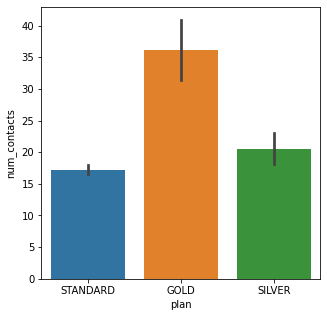

In [89]:
plt.figure(figsize=(5, 5))
sns.barplot(x='plan', y='num_contacts', data=users)

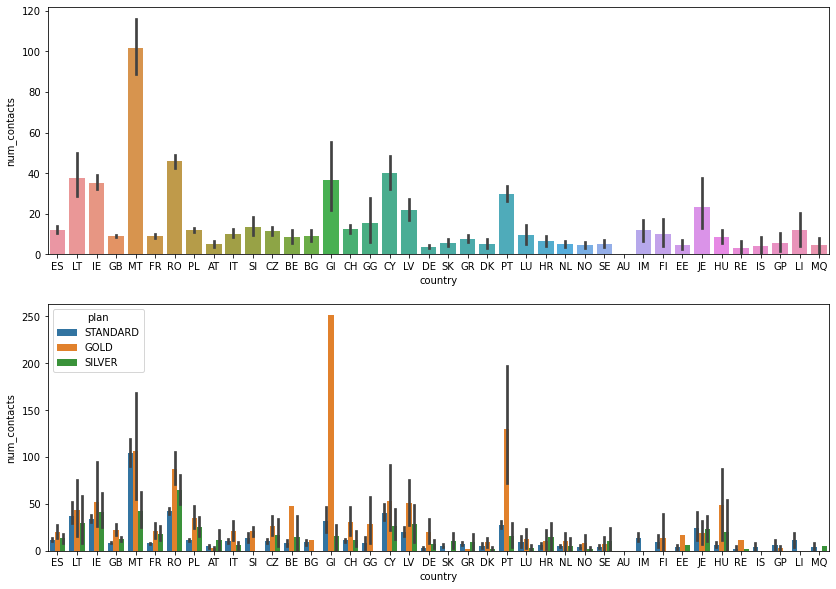

In [90]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(211)
sns.barplot(x='country', y='num_contacts', data=users, ax= ax1)
ax2 = plt.subplot(212)
sns.barplot(x='country', y='num_contacts', data=users, hue = 'plan', ax= ax2)

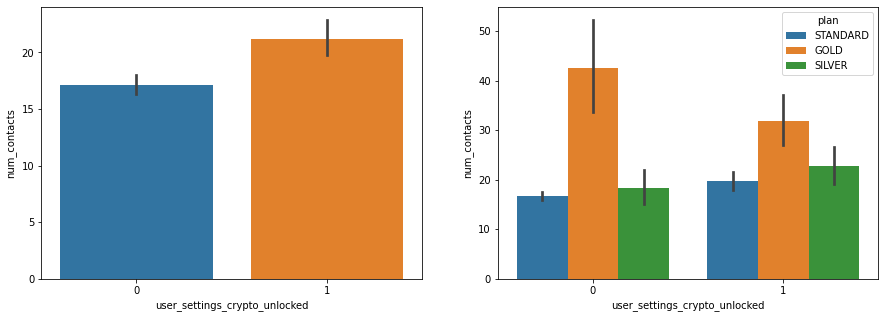

In [91]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
sns.barplot(x='user_settings_crypto_unlocked', y='num_contacts', data=users, ax = ax1)
ax2 = plt.subplot(122)
sns.barplot(x='user_settings_crypto_unlocked', y='num_contacts', hue = 'plan', data=users, ax = ax2)

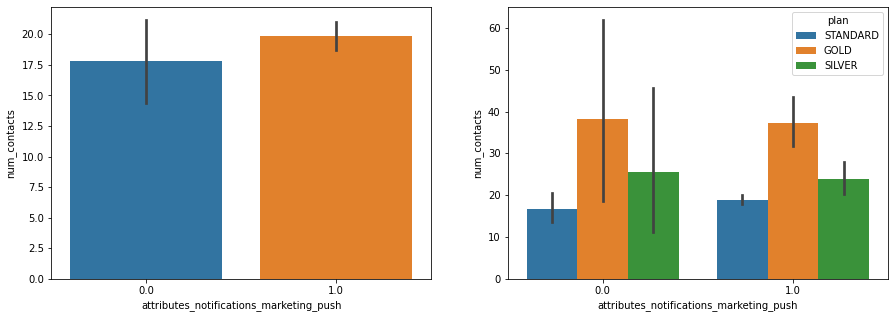

In [92]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
sns.barplot(x='attributes_notifications_marketing_push', y='num_contacts', data=users, ax = ax1)
ax2 = plt.subplot(122)
sns.barplot(x='attributes_notifications_marketing_push', y='num_contacts', hue = 'plan', data=users, ax = ax2)

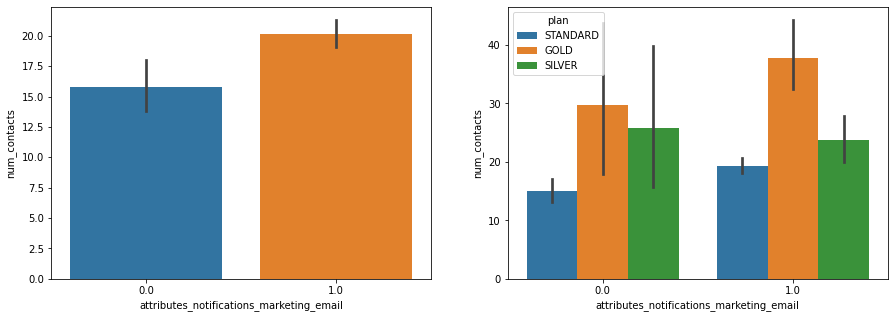

In [93]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
sns.barplot(x='attributes_notifications_marketing_email', y='num_contacts', data=users, ax = ax1)
ax2 = plt.subplot(122)
sns.barplot(x='attributes_notifications_marketing_email', y='num_contacts', hue = 'plan', data=users, ax = ax2)

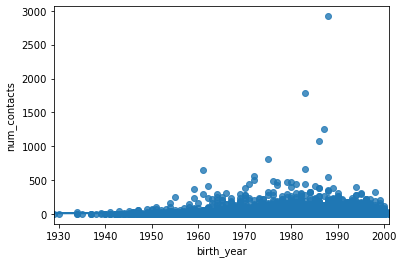

In [94]:
sns.regplot(x='birth_year', y='num_contacts', data=users) 

In [95]:
users.corr()['birth_year']['num_contacts']

0.023119165956777193

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 <a list of 69 Text major ticklabel objects>)

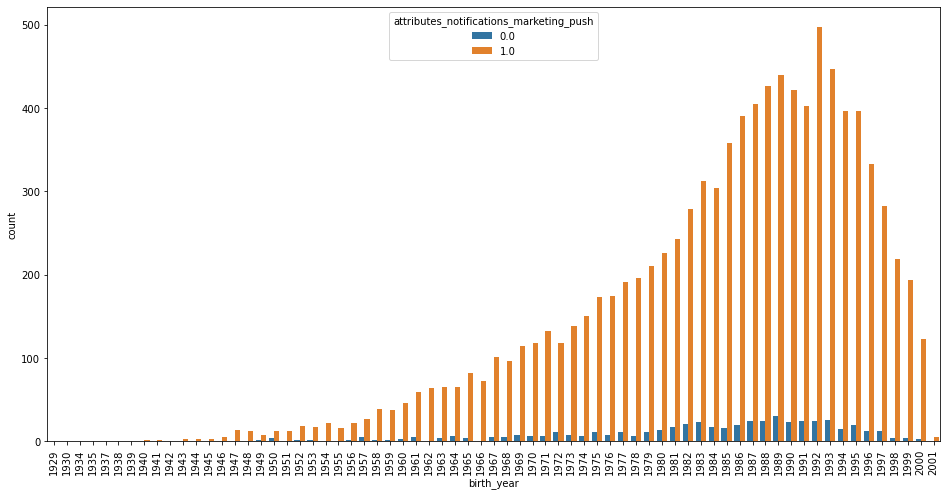

In [96]:
plt.figure(figsize=(16, 8))
sns.countplot(x='birth_year', data=users, hue='attributes_notifications_marketing_push')
plt.xticks(rotation=90)

### 1.8.2 Transactions

#### 1.8.2.1 Distribution of each variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

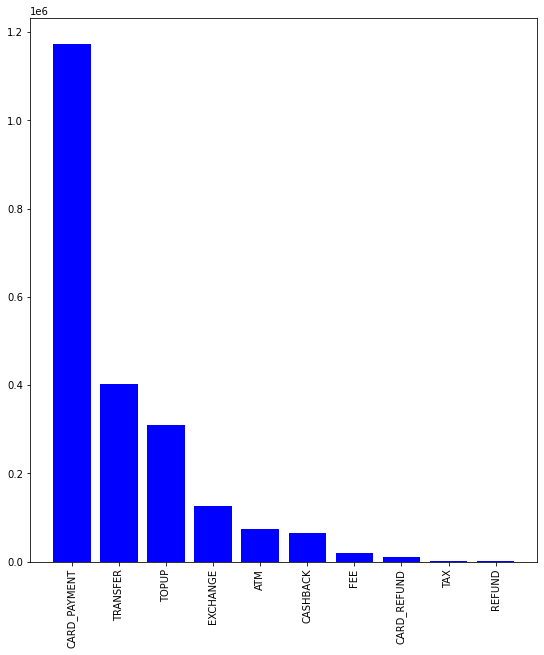

In [97]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(transactions['transactions_type']).keys()
sizes = pd.value_counts(transactions['transactions_type'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

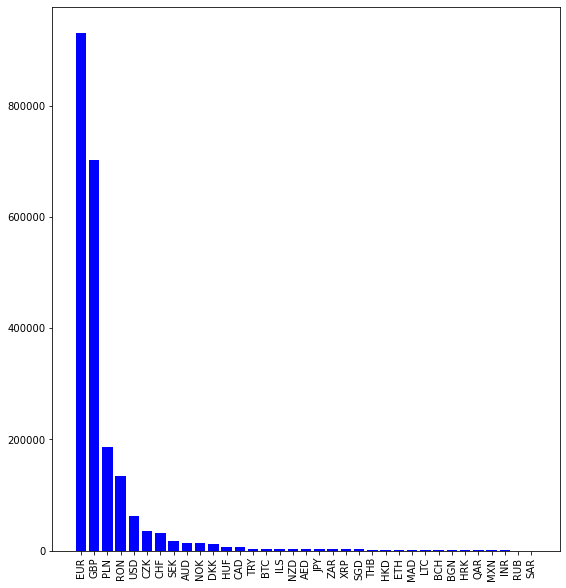

In [98]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(transactions['transactions_currency']).keys()
sizes = pd.value_counts(transactions['transactions_currency'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

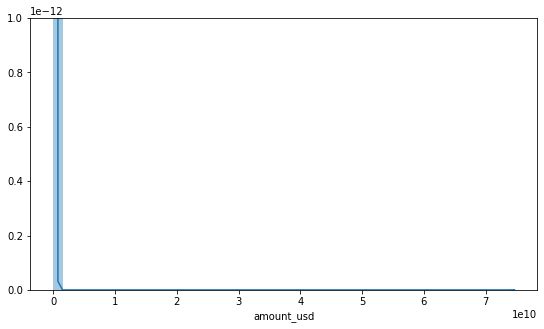

In [99]:
plt.figure(figsize=(20,5))
ax1 = plt.subplot(121)
sns.distplot(transactions['amount_usd'], ax = ax1)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

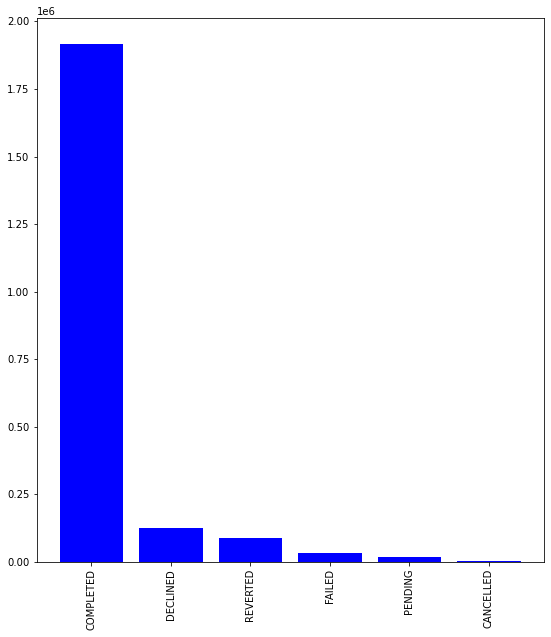

In [100]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(transactions['transactions_state']).keys()
sizes = pd.value_counts(transactions['transactions_state'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

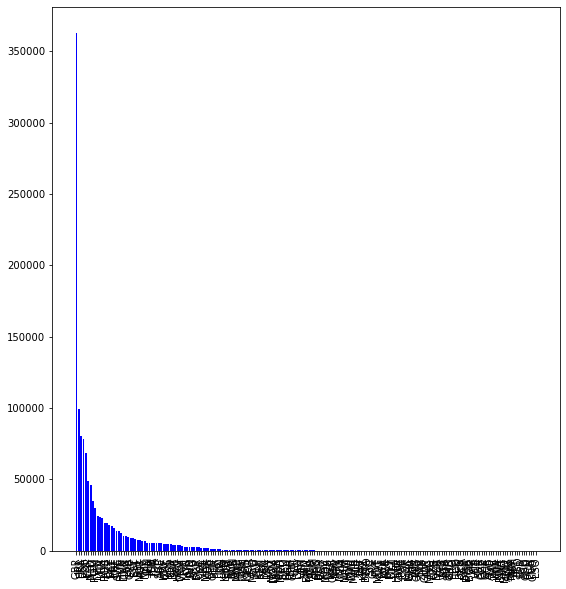

In [101]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(transactions['ea_merchant_country']).keys()
sizes = pd.value_counts(transactions['ea_merchant_country'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

([0, 1], <a list of 2 Text major ticklabel objects>)

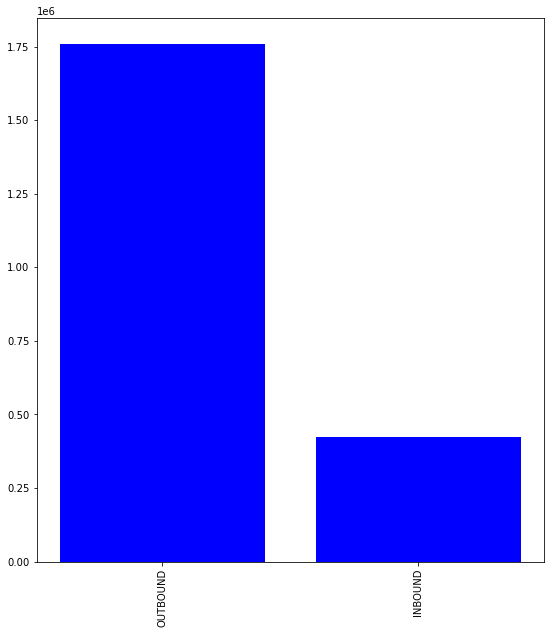

In [102]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(transactions['direction']).keys()
sizes = pd.value_counts(transactions['direction'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

#### 1.8.2.2 Relatioship between variables

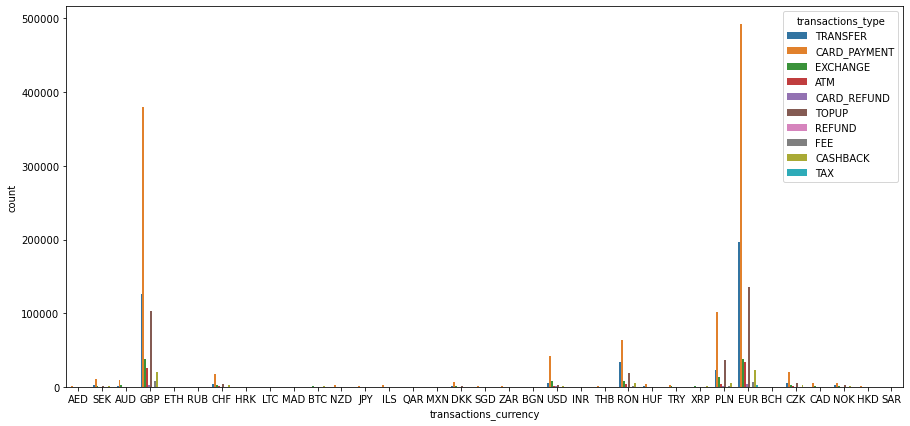

In [103]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_currency', data=transactions, hue='transactions_type')

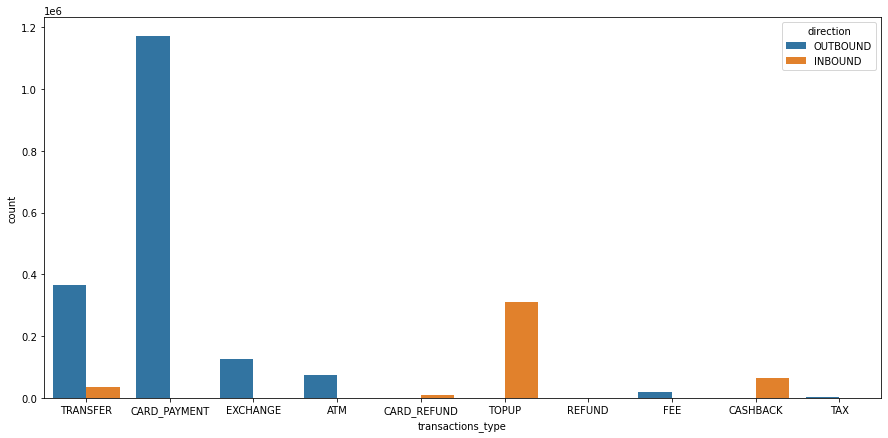

In [104]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_type', data=transactions, hue='direction')

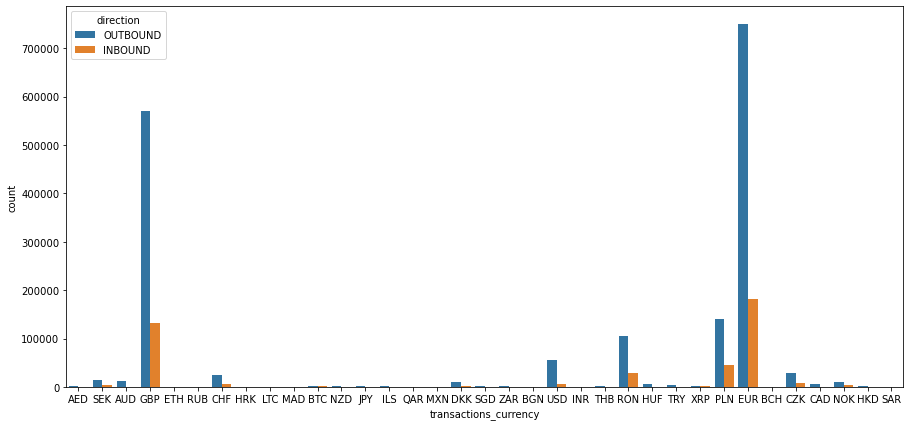

In [105]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_currency', data=transactions, hue='direction')

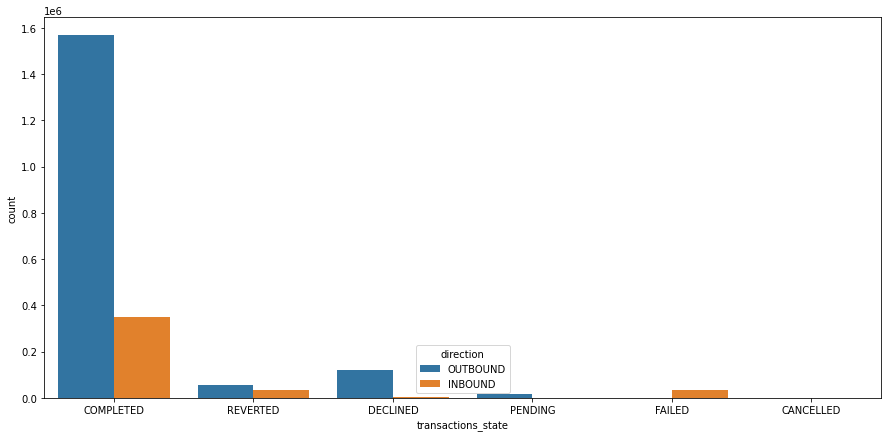

In [106]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_state', data=transactions, hue='direction')

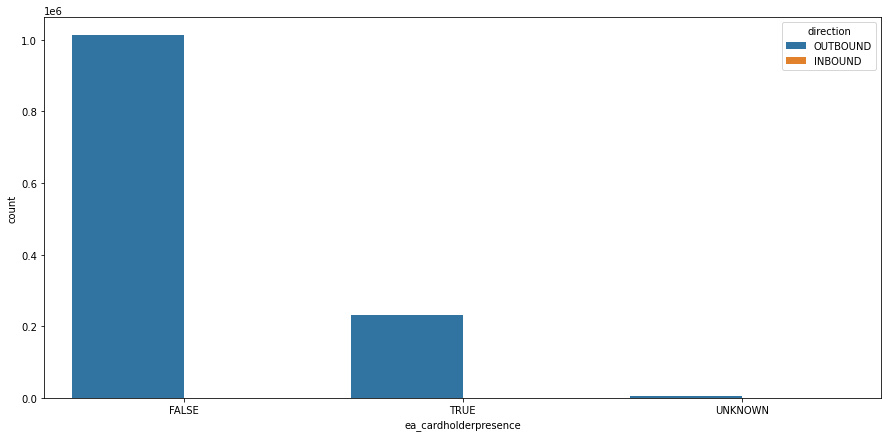

In [107]:
plt.figure(figsize=(15, 7))

sns.countplot(x='ea_cardholderpresence', data=transactions, hue='direction')

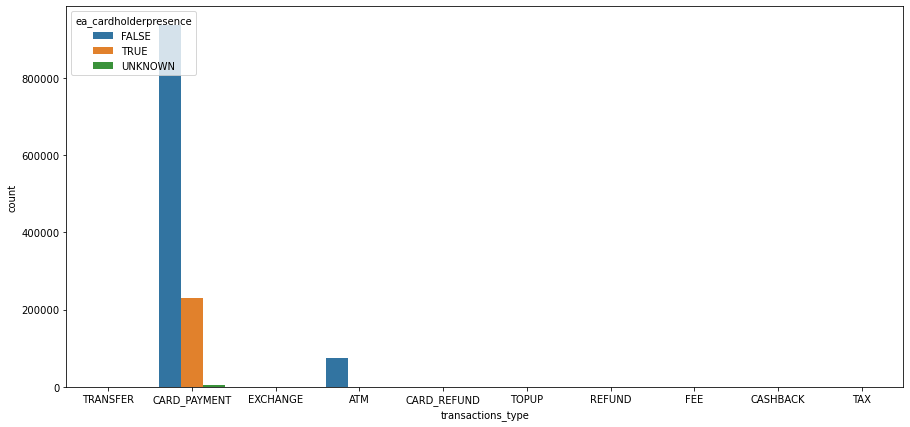

In [108]:
plt.figure(figsize=(15, 7))

sns.countplot(x='transactions_type', data=transactions, hue='ea_cardholderpresence')

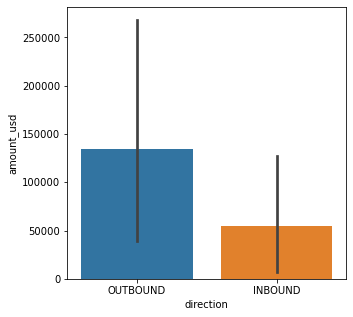

In [109]:
plt.figure(figsize=(5, 5))
sns.barplot(x='direction', y='amount_usd', data=transactions)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

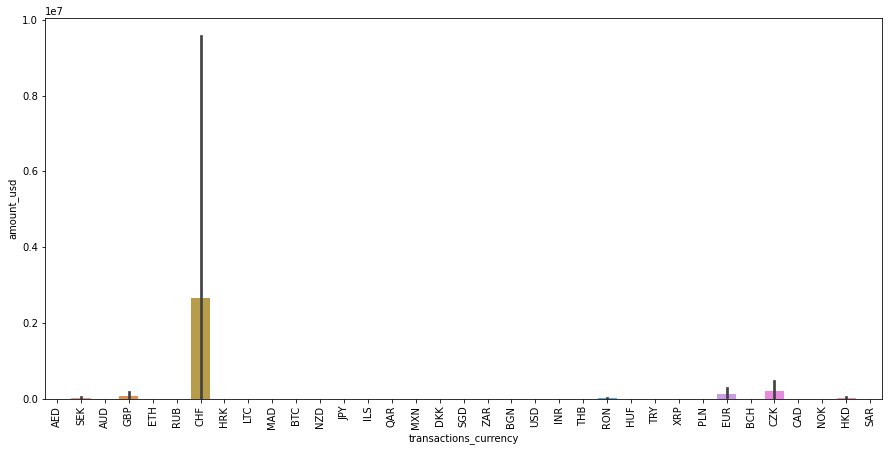

In [110]:
plt.figure(figsize=(15, 7))
sns.barplot(x='transactions_currency', y='amount_usd', data=transactions)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

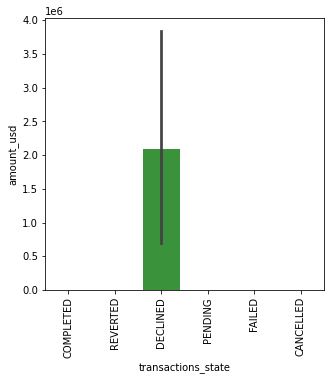

In [111]:
plt.figure(figsize=(5, 5))
sns.barplot(x='transactions_state', y='amount_usd', data=transactions)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

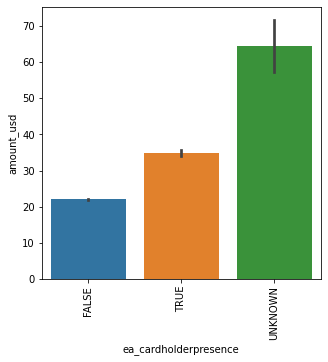

In [112]:
plt.figure(figsize=(5, 5))
sns.barplot(x='ea_cardholderpresence', y='amount_usd', data=transactions)
plt.xticks(rotation=90)

### 1.8.3 Devices

#### 1.8.3.1 Distribution of each variable

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

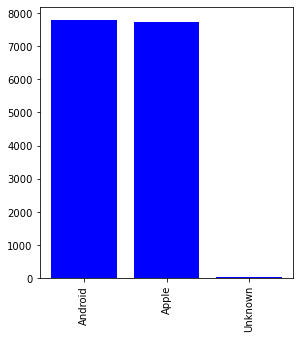

In [113]:
plt.figure(figsize=(10, 5))
labels = pd.value_counts(devices['brand']).keys()
sizes = pd.value_counts(devices['brand'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)


### 1.8.4 Notifications

#### 1.8.4.1 Distribution of each variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

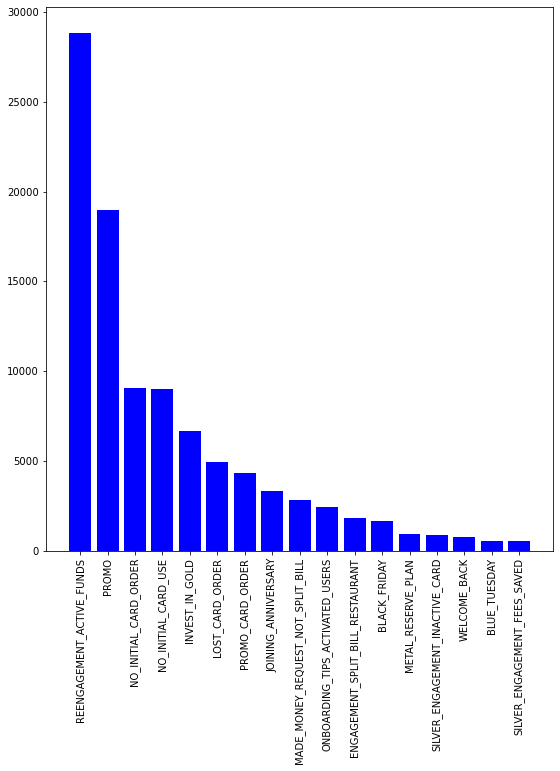

In [114]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(notif['reason']).keys()
sizes = pd.value_counts(notif['reason'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

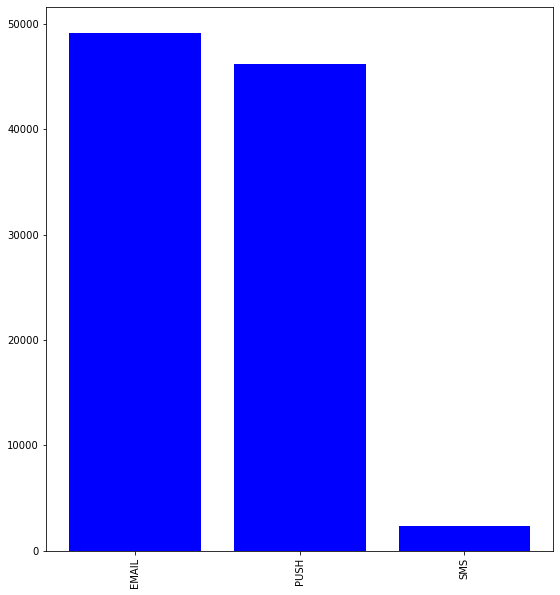

In [115]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(notif['channel']).keys()
sizes = pd.value_counts(notif['channel'])
ax = plt.subplot(121)
ax.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)

([0, 1], <a list of 2 Text major ticklabel objects>)

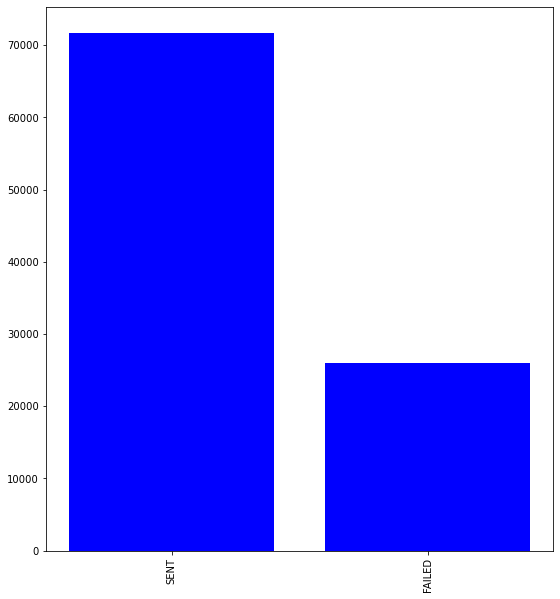

In [116]:
plt.figure(figsize=(20, 10))
labels = pd.value_counts(notif['status']).keys()
sizes = pd.value_counts(notif['status'])
ax1 = plt.subplot(121)
ax1.bar(x=labels, height= sizes, color='blue')
plt.xticks(rotation=90)


#### 1.8.4.2 Relationships between variables



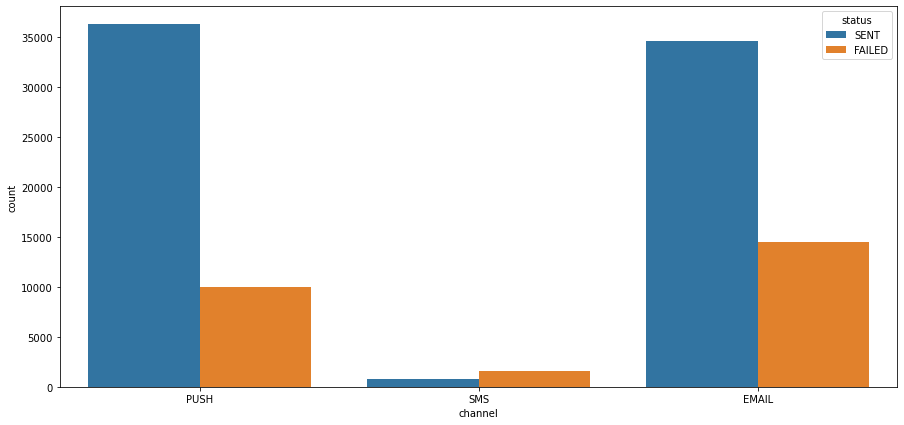

In [117]:
plt.figure(figsize=(15, 7))
sns.countplot(x='channel', data=notif, hue='status')

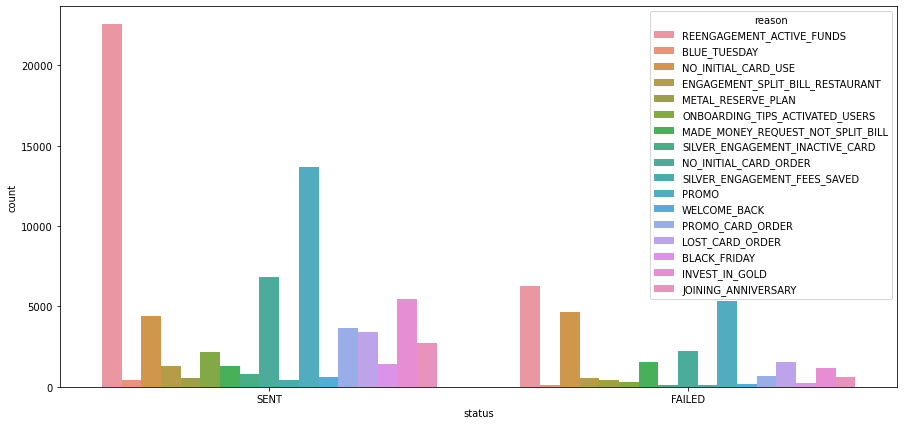

In [118]:
plt.figure(figsize=(15, 7))
sns.countplot(x='status', data=notif, hue='reason')

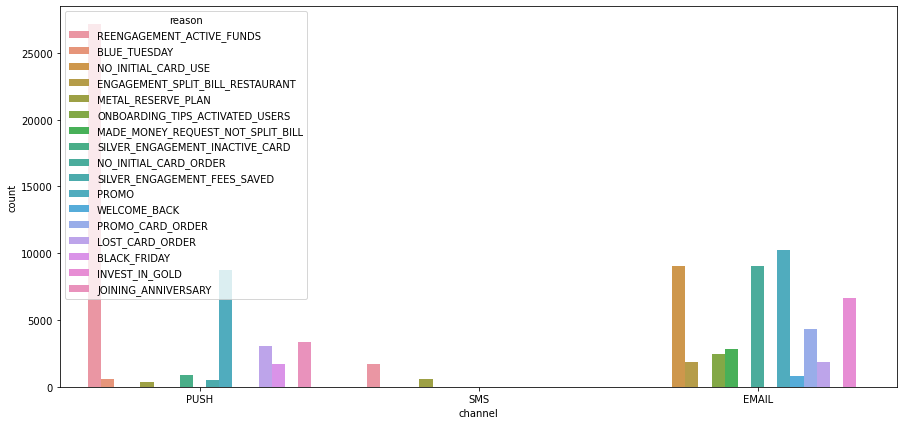

In [119]:
plt.figure(figsize=(15, 7))

sns.countplot(x='channel', data=notif, hue='reason')

## 1.9 Merge

### 1.9.1 Notifications-Users

In [120]:
notif_users = pd.merge(notif,users,on='user_id',how='inner')

In [121]:
notif_users.head(10)

,reason,channel,status,user_id,created_date_x,birth_year,country,city,created_date_y,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-27 17:59:46.786645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-21 18:03:53.943645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2019-01-23 18:06:10.731645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2019-01-11 17:59:44.400645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
5,PROMO,EMAIL,FAILED,user_1252,2019-01-17 16:14:18.624645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
6,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-11-17 18:12:38.112645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
7,PROMO,PUSH,FAILED,user_1252,2019-01-17 16:14:18.656645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
8,PROMO,PUSH,SENT,user_1252,2019-01-17 19:42:48.432645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0
9,PROMO,EMAIL,SENT,user_1252,2019-01-17 19:42:48.402645,1994,PL,Zakopane,2018-06-17 20:33:54.480645,1,STANDARD,1.0,1.0,13,0,0


In [122]:
notif_users.columns

Index(['reason', 'channel', 'status', 'user_id', 'created_date_x',
       'birth_year', 'country', 'city', 'created_date_y',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals'],
      dtype='object')

#### 1.9.1.1 df1---> attributes with channel

In [123]:
df1 = notif_users[['attributes_notifications_marketing_push','attributes_notifications_marketing_email','channel']]

In [124]:
df1.head(60)

,attributes_notifications_marketing_push,attributes_notifications_marketing_email,channel
0,1.0,1.0,PUSH
1,1.0,1.0,PUSH
2,1.0,1.0,PUSH
3,1.0,1.0,PUSH
4,1.0,1.0,PUSH
5,1.0,1.0,EMAIL
6,1.0,1.0,PUSH
7,1.0,1.0,PUSH
8,1.0,1.0,PUSH
9,1.0,1.0,EMAIL


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

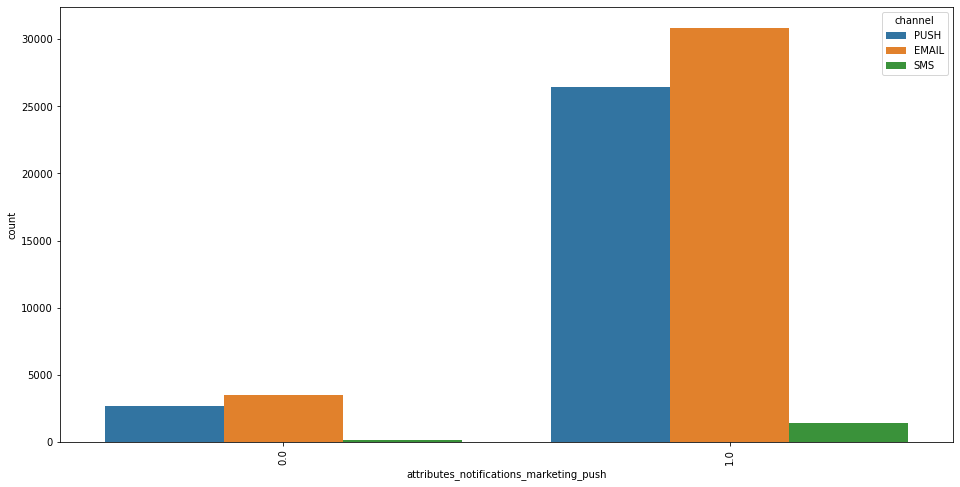

In [125]:
plt.figure(figsize=(16, 8))
sns.countplot(x='attributes_notifications_marketing_push', data=notif_users, hue='channel')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

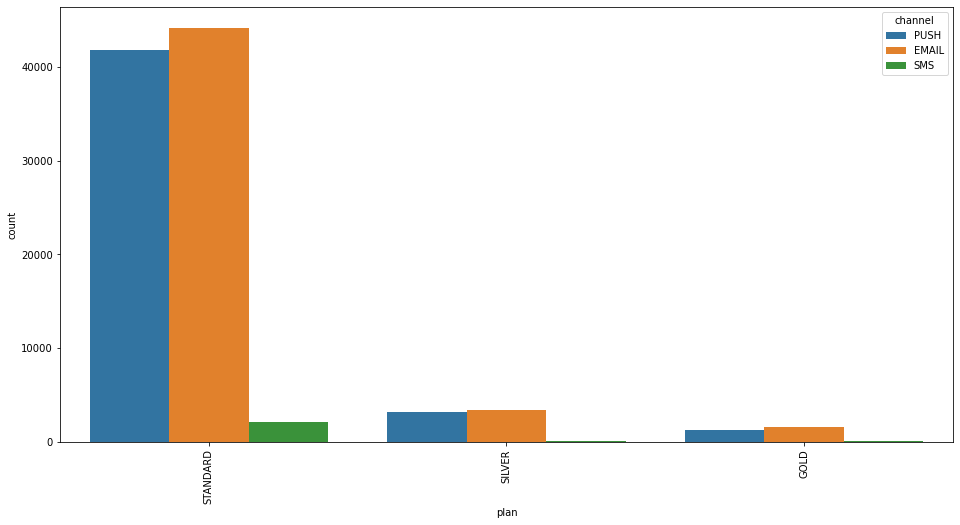

In [126]:
plt.figure(figsize=(16, 8))
sns.countplot(x='plan', data=notif_users, hue='channel')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

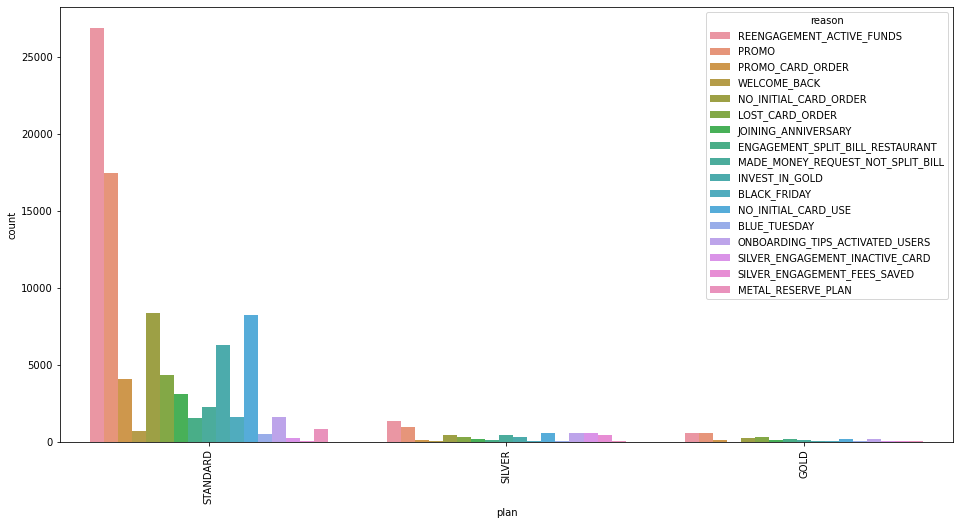

In [127]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='plan', data=notif_users, hue='reason') 
plt.xticks(rotation=90)

### 1.9.2 Notifications-Devices

In [128]:
notif_devices = pd.merge(notif,devices,on='user_id',how='inner')

In [129]:
notif_devices.head()

,reason,channel,status,user_id,created_date,brand
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645,Apple
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-27 17:59:46.786645,Apple
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-21 18:03:53.943645,Apple
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2019-01-23 18:06:10.731645,Apple
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2019-01-11 17:59:44.400645,Apple


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

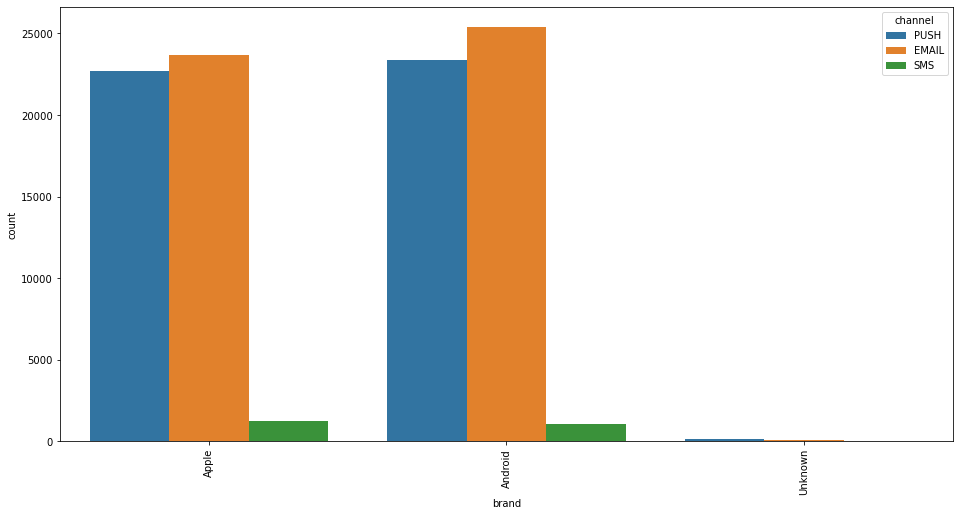

In [130]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='brand', data=notif_devices, hue='channel') 
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

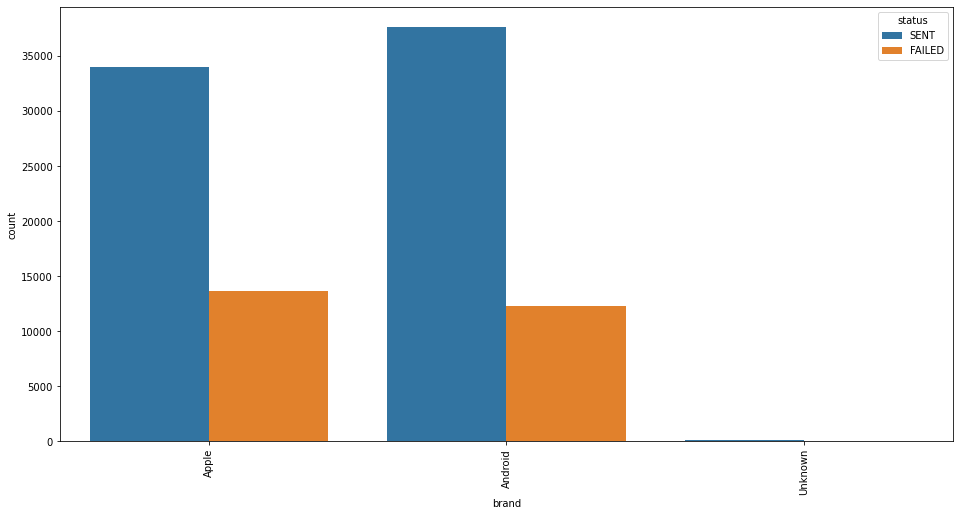

In [131]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='brand', data=notif_devices, hue='status') 
plt.xticks(rotation=90)

### 1.9.3 Transactions-Users

In [132]:
trans_users = pd.merge(transactions,users,on='user_id',how='inner')

In [133]:
trans_users.head(10)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,...,country,city,created_date_y,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
1,transaction_215,TRANSFER,AED,14.47,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
2,transaction_216,ATM,AED,41.33,COMPLETED,FALSE,6011.0,Abu Dhabi,ARE,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
3,transaction_217,CARD_PAYMENT,AED,6.61,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
4,transaction_218,TRANSFER,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
5,transaction_371,CARD_PAYMENT,AED,7.26,COMPLETED,FALSE,5411.0,Dubai,ARE,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
6,transaction_372,ATM,AED,41.33,COMPLETED,FALSE,6011.0,Dubai,ARE,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
7,transaction_373,TRANSFER,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
8,transaction_374,TRANSFER,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0
9,transaction_380,TRANSFER,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,...,GB,Belfast,2018-01-11 08:08:25.364487,0,STANDARD,1.0,1.0,1,0,0


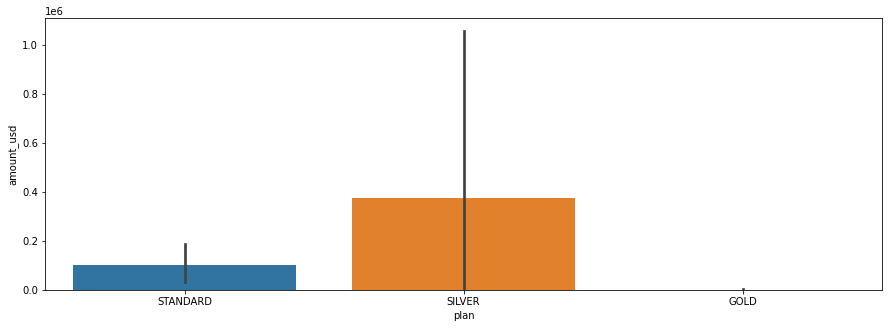

In [134]:
plt.figure(figsize=(15, 5))
sns.barplot(x='plan', y='amount_usd', data=trans_users)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

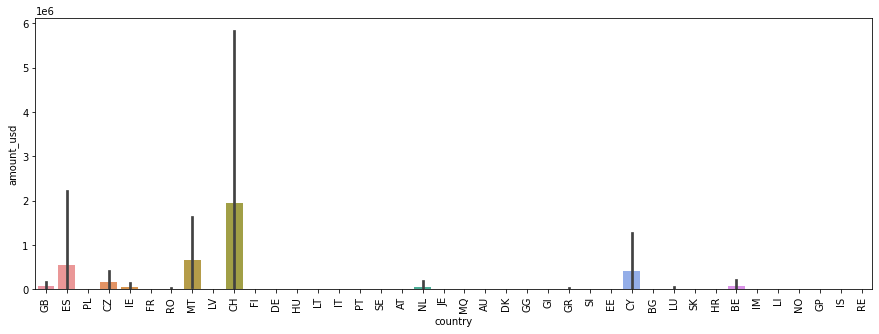

In [135]:
plt.figure(figsize=(15, 5))
sns.barplot(x='country', y='amount_usd', data=trans_users)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

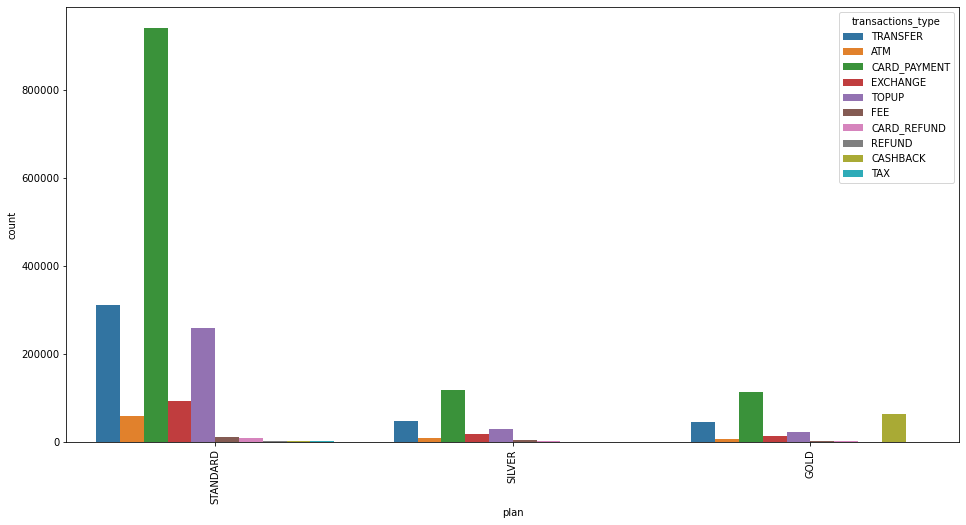

In [136]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='plan', data=trans_users, hue='transactions_type') 
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

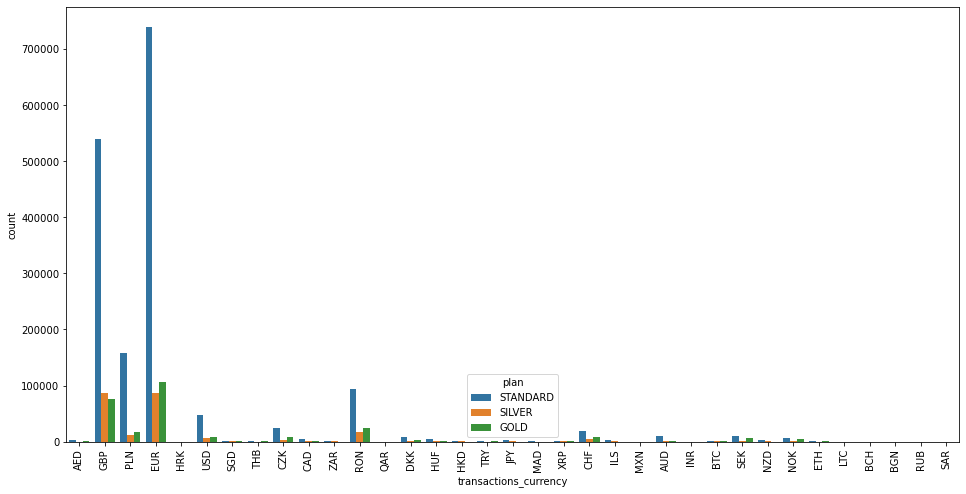

In [137]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='transactions_currency', data=trans_users, hue='plan') 
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

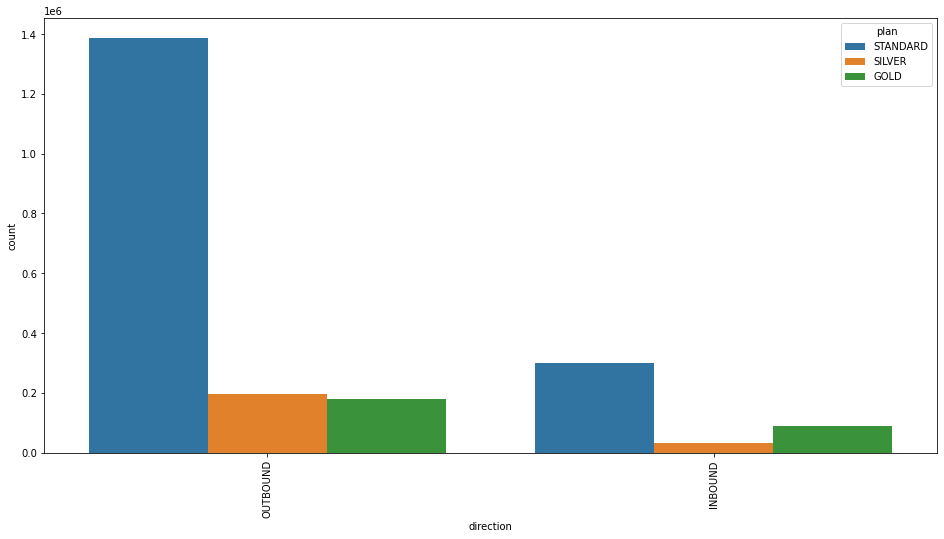

In [138]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='direction', data=trans_users, hue='plan') 
plt.xticks(rotation=90)

### 1.9.4 Users-Devices

In [139]:
users_dev = pd.merge(users,devices,on='user_id',how='inner')

In [140]:
users_dev.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,Apple
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,Apple
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,Apple
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,Apple
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,Apple


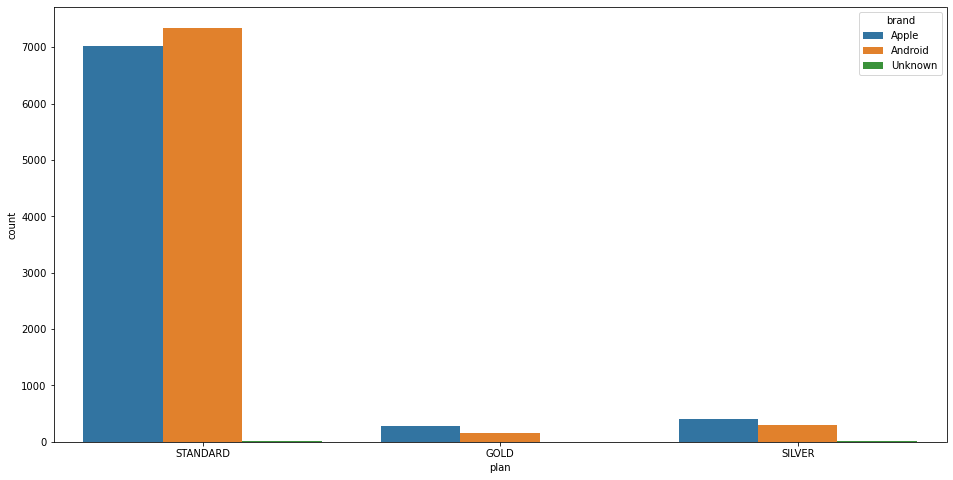

In [141]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='plan', data=users_dev, hue='brand') 
